In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# 1.

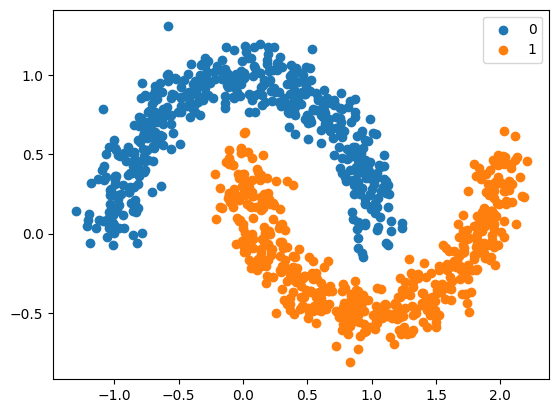

In [2]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)
plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()

### 1. Preparación de los datos: División en conjuntos de entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Creación del modelo de red neuronal con Keras

In [4]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # Capa de salida para clasificación binaria
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3. Compilación del modelo

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 4. Entrenamiento del modelo

In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7875 - loss: 0.6619 - val_accuracy: 0.9000 - val_loss: 0.6017
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8599 - loss: 0.5971 - val_accuracy: 0.8813 - val_loss: 0.5323
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8648 - loss: 0.5351 - val_accuracy: 0.8813 - val_loss: 0.4601
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8252 - loss: 0.4858 - val_accuracy: 0.8813 - val_loss: 0.3819
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8495 - loss: 0.4022 - val_accuracy: 0.8875 - val_loss: 0.3148
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8674 - loss: 0.3295 - val_accuracy: 0.8875 - val_loss: 0.2752
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8699 - loss: 0.3048 - val_accuracy: 0.9000 - val_loss: 0.2500
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8613 - loss: 0.3082 - val_accuracy: 0.9000 - val_los

### 5. Evaluación del modelo

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Perdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9912 - loss: 0.0399  
Perdida en el conjunto de prueba: 0.0387
Precisión en el conjunto de prueba: 0.9900


### 6. Visualización de la curva de entrenamiento

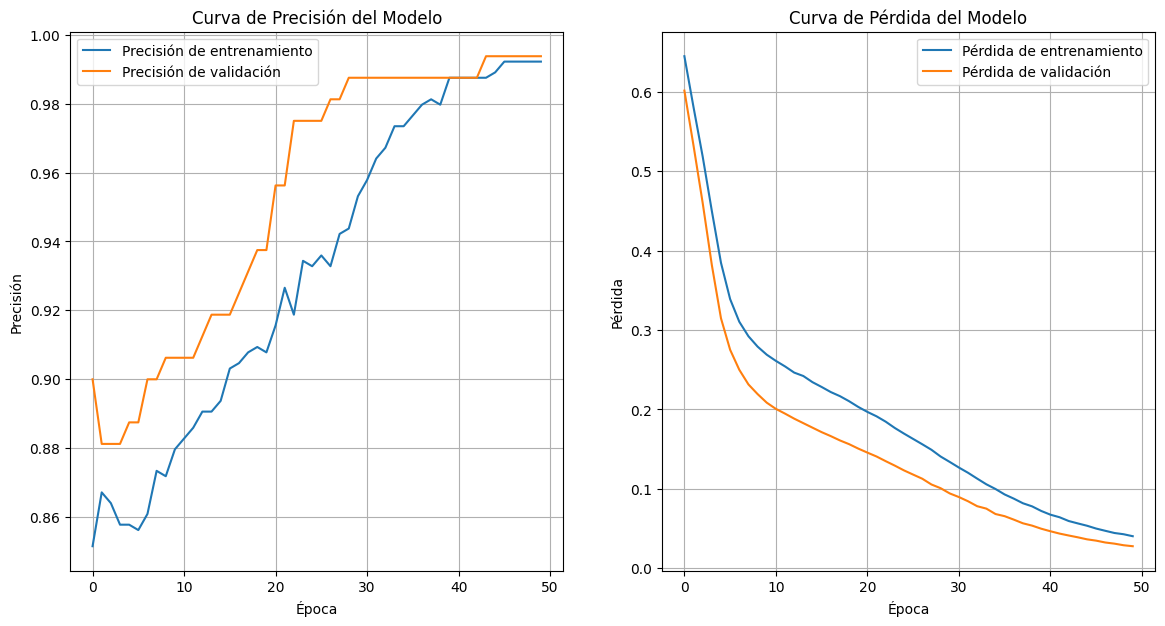

In [8]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# 2.

In [9]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Preparación de los datos: División en conjuntos de entrenamiento y prueba

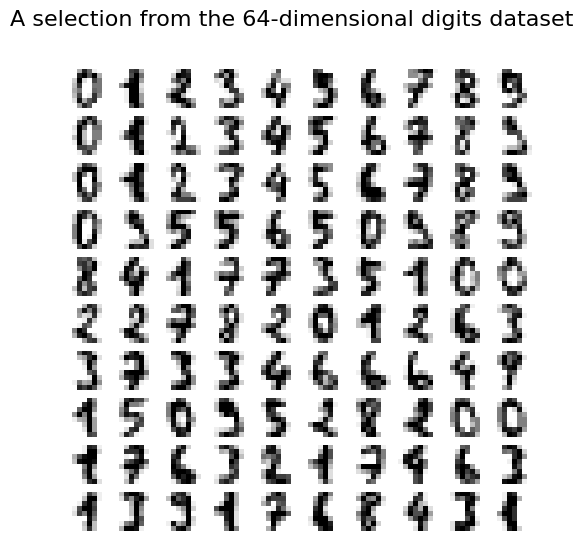

In [10]:
digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [11]:
# Normalizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

### 2. Creación del modelo de red neuronal con Keras

In [12]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3. Compilación del modelo

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 4. Entrenamiento del modelo

In [14]:
history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Accuracy en test:", test_acc)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2322 - loss: 2.1807 - val_accuracy: 0.7431 - val_loss: 1.4623
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6404 - loss: 1.3528 - val_accuracy: 0.8889 - val_loss: 0.8034
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8143 - loss: 0.7854 - val_accuracy: 0.9236 - val_loss: 0.4633
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8812 - loss: 0.4980 - val_accuracy: 0.9306 - val_loss: 0.3277
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9066 - loss: 0.3460 - val_accuracy: 0.9306 - val_loss: 0.2767
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9334 - loss: 0.2745 - val_accuracy: 0.9306 - val_loss: 0.2443
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9530 - loss: 0.2119 - val_accuracy: 0.9306 - val_loss: 0.2363
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9664 - loss: 0.1706 - val_accuracy: 0.9375 - val_loss

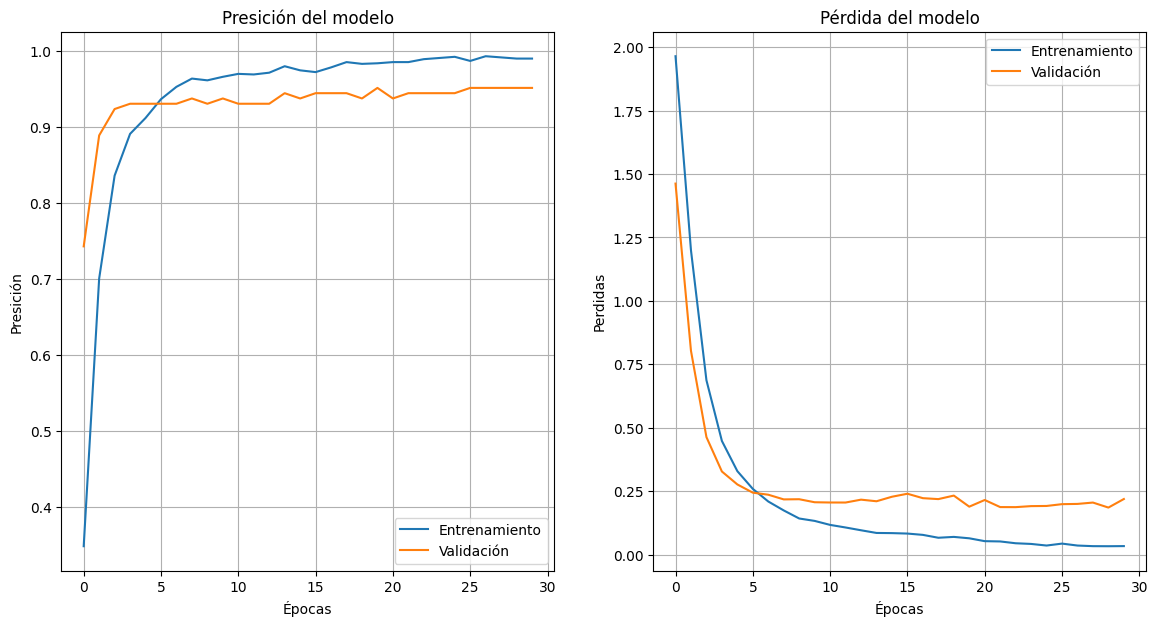

In [20]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Presición del modelo")
plt.xlabel("Épocas")
plt.ylabel("Presición")
plt.legend(["Entrenamiento", "Validación"])
plt.grid()

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Pérdida del modelo")
plt.xlabel("Épocas")
plt.ylabel("Perdidas")
plt.legend(["Entrenamiento", "Validación"])
plt.grid()
plt.show()